<a href="https://colab.research.google.com/github/anastasiia-vsk/Start-into-ML/blob/main/%D0%92%D0%B0%D1%81%D1%8C%D0%BA%D0%BE_%D0%9F%D0%A0_01_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.regularizers import l1, l2, l1_l2
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

!pip install keras-tuner -q
from kerastuner.tuners import RandomSearch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


<ipython-input-4-330bd21e6d50>:13: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


# ЛАБОРАТОРНА РОБОТА 8
## Розробка нейронної мережі з використанням бібліотеки KERAS

**ЗАВДАННЯ 1.**

Побудувати звичайну багатошарову нейронну мережу для датасету fashion mnist

1. Завантажити датасет

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

2. Роздрукувати 10 зображень.

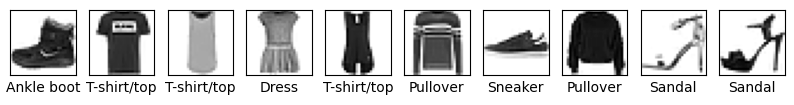

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

3. Підготовувати дані, побудувати архітектуру.

5. Вивести архітектуру моделі.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

5. Використати ранню зупинку і зменшення швидкості для запобіганню
перенавчанню.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

# моя модель показувала кращі результати з використанням лише ранньої зупинки

In [ ]:
history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels),
                    callbacks=[
                                early_stopping
                                # reduce_lr
                               ])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7273 - loss: 0.7597 - val_accuracy: 0.8370 - val_loss: 0.4366
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8371 - loss: 0.4517 - val_accuracy: 0.8523 - val_loss: 0.4044
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8495 - loss: 0.4134 - val_accuracy: 0.8643 - val_loss: 0.3724
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8604 - loss: 0.3872 - val_accuracy: 0.8582 - val_loss: 0.3853
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8651 - loss: 0.3711 - val_accuracy: 0.8706 - val_loss: 0.3626
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8697 - loss: 0.3620 - val_accuracy: 0.8728 - val_loss: 0.3523
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8739 - loss: 0.3461 - val_accuracy: 0.8707 - val_loss: 0.3529
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 

6. Зберегти модель на гугл диск.

In [ ]:
from google.colab import drive
model.save('/content/drive/MyDrive/fashion_mnist_model.keras')

7. Побудувати графіки функції втрат і точності для тренувальних і
тестових даних

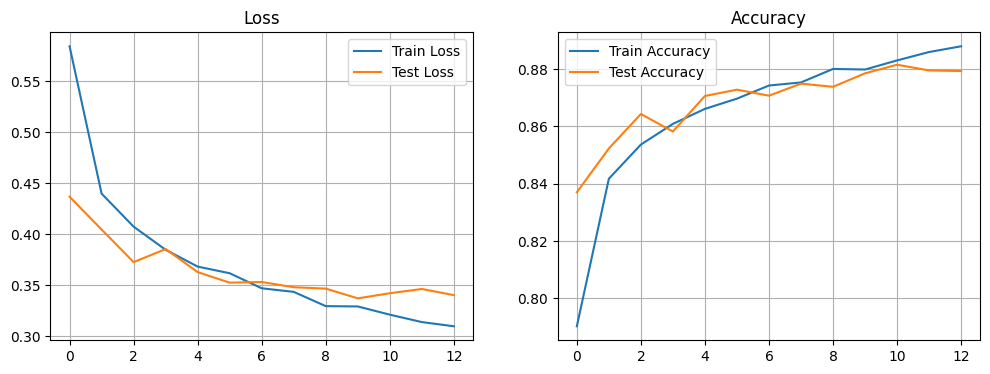

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

8. Вивести класифікаційний звіт.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)

predicted_labels = np.argmax(predictions, axis=1)

# Виведення класифікаційного звіту
print(classification_report(test_labels, predicted_labels, target_names=class_names))

313/313 - 1s - 3ms/step - accuracy: 0.8785 - loss: 0.3369
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.84      0.83      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.80      0.78      0.79      1000
       Dress       0.89      0.90      0.89      1000
        Coat       0.75      0.83      0.79      1000
      Sandal       0.99      0.94      0.96      1000
       Shirt       0.71      0.64      0.67      1000
     Sneaker       0.93      0.96      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



9. Результати розпізнавання із прогнозованим і справжнім класом

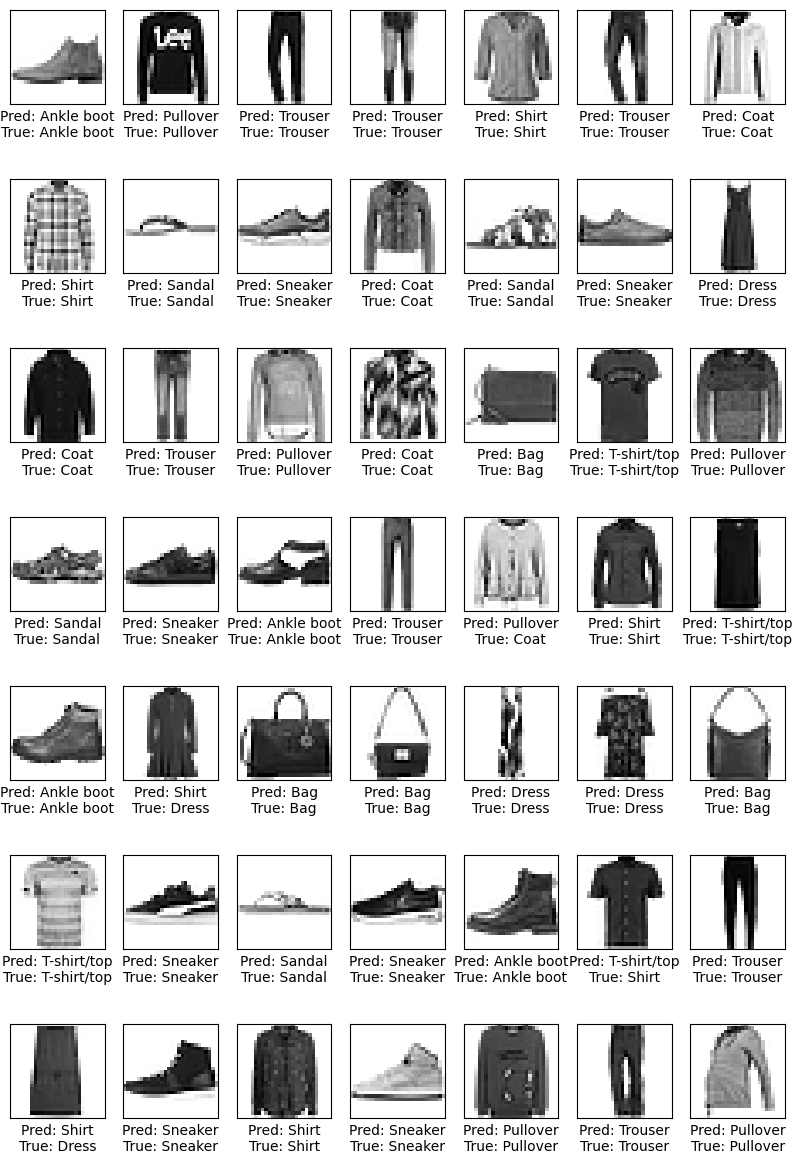

In [ ]:
plt.figure(figsize=(10, 15))
rows, cols = 7, 7
for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[test_labels[i]]}")
plt.show()

**ЗАВДАННЯ 2.**

Побудувати нейронну мережу, аналогічну завданню 1 для датасета fashion mnist
Використати Keras Tuner підбору гіперпараметрів моделі.
Порівняти результати завдання 1 і 2 (точність і функцію втрат).
Написати висновки.

In [6]:
fashion_mnist_with_tuner = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist_with_tuner.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [7]:
# ПРОБУВАЛА БІЛЬШЕ ПАРАМЕТРІВ + max_trials = 10. ПРОГРАМНО ЛИШЕ ПЕРЕБИРАННЯ ПАРАМЕТРІВ ЗАЙНЯЛО БІЛЬШЕ 6 ГОДИН І ТАК І НЕ ЗАВЕРШИЛОСЯ, СЕСІЯ КОЛАБ ЗАЕКСПАЙРИЛАСЯ

# def build_model(hp):
#     model = keras.Sequential()
#     model.add(Flatten(input_shape=(28, 28)))

#     # Додавання шарів, які будуть тюнуватися
#     for i in range(hp.Int('num_layers', 1, 4)):
#         units = hp.Int('units_' + str(i), min_value=32, max_value=512, step=32)
#         activation = hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid'])

#         # Вибір регуляризатора за рядком
#         regularizer_choice = hp.Choice('regularizer_' + str(i), values=['l1', 'l2', 'l1_l2'])
#         if regularizer_choice == 'l1':
#             regularizer = l1(0.001)
#         elif regularizer_choice == 'l2':
#             regularizer = l2(0.001)
#         else:
#             regularizer = l1_l2(0.001)

#         model.add(Dense(units=units, activation=activation, kernel_regularizer=regularizer))
#         model.add(BatchNormalization())
#         model.add(Dropout(hp.Float('dropout_' + str(i), min_value=0.2, max_value=0.5, step=0.1)))

#     model.add(Dense(10, activation='softmax'))

#     model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])

#     return model



def build_model(hp):
    model = keras.Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    for i in range(hp.Int('num_layers', 1, 4)):
        units = hp.Int('units_' + str(i), min_value=64, max_value=512, step=64)
        activation = 'relu'

        model.add(Dense(units=units, activation=activation))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_' + str(i), min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [9]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_logs',
    project_name='fashion_mnist_with_tuner_classification'
)

In [10]:
# Визначення ранньої зупинки та зниження швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [11]:
tuner.search(x_train, y_train, epochs=500, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

Trial 5 Complete [00h 20m 37s]
val_accuracy: 0.892300009727478

Best val_accuracy So Far: 0.8956000208854675
Total elapsed time: 01h 32m 33s


In [19]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,754 (874.04 KB)

 Trainable params: 222,986 (871.04 KB)

 Non-trainable params: 768 (3.00 KB)

In [20]:
history = best_model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.8986 - loss: 0.2758 - val_accuracy: 0.8749 - val_loss: 0.3444 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step - accuracy: 0.8951 - loss: 0.2814 - val_accuracy: 0.8884 - val_loss: 0.3232 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8966 - loss: 0.2848 - val_accuracy: 0.8804 - val_loss: 0.3328 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8912 - loss: 0.2919 - val_accuracy: 0.8829 - val_loss: 0.3305 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8938 - loss: 0.2896 - val_accuracy: 0.8833 - val_loss: 0.3461 - learning_rate: 0.0010


In [22]:
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8745 - loss: 0.3437
Test accuracy: 0.8748999834060669
Test loss: 0.3444478213787079


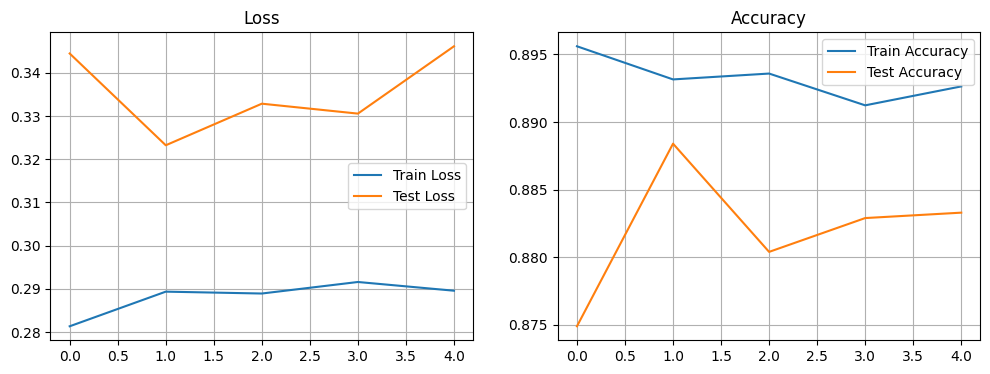

In [23]:
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

In [28]:
# Оцінка моделі
test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Передбачення для тестових даних
predictions = best_model.predict(x_test)

# Перетворення ймовірностей у передбачені мітки
predicted_labels = np.argmax(predictions, axis=1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(classification_report(y_test, predicted_labels, target_names=class_names))

313/313 - 1s - 2ms/step - accuracy: 0.8749 - loss: 0.3444
Test accuracy: 0.8748999834060669
Test loss: 0.3444478213787079
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.78      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.75      0.83      0.79      1000
       Dress       0.89      0.88      0.89      1000
        Coat       0.74      0.84      0.79      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.68      0.62      0.65      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



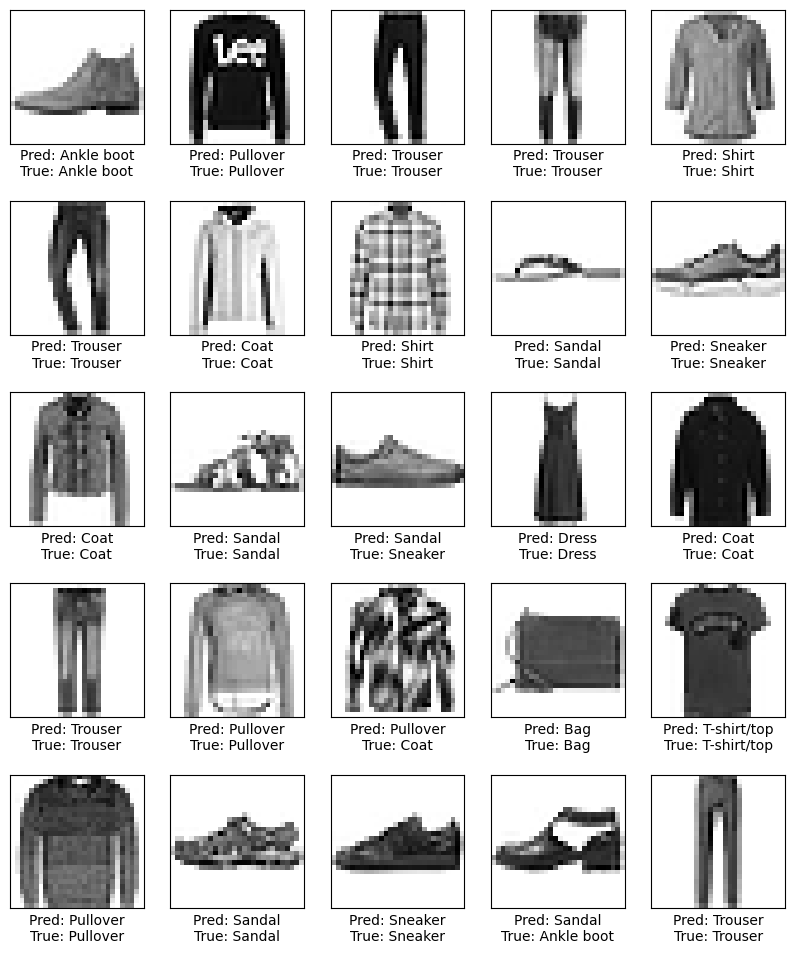

In [32]:
plt.figure(figsize=(10, 12))
rows, cols = 5, 5
for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[y_test[i]]}")
plt.show()

**ВИСНОВКИ**

Згідно з результатами двох моделей (з тюнером і без нього), є кілька ключових показників, які дозволяють зробити висновок про те, яка модель є кращою:

- Точність (accuracy):
  Модель без тюнера досягла трохи вищої точності: 0.8785 проти 0.8749 у моделі з тюнером.
  
- Втрати (loss):
  Модель без тюнера також продемонструвала нижчі втрати: 0.3369 порівняно з 0.3444 у моделі з тюнером. Нижчі втрати свідчать про те, що модель краще оптимізувала свою функцію втрат і ближче до ідеальних передбачень.

- Precision, Recall, F1-score:
  Загалом, модель без тюнера має трохи кращі або рівні показники за метриками precision, recall і F1-score для більшості класів. Особливо помітні поліпшення в класах "T-shirt/top" і "Shirt", де точність та F1-score вищі.

**Отже, модель без тюнера показала трохи кращі результати як за загальною точністю, так і за метриками precision, recall і F1-score для більшості класів. Вона демонструє кращу продуктивність, менші втрати та кращу класифікацію складних класів, таких як "Shirt". Отже, модель без тюнера є більш оптимальним вибором у цьому випадку.**